# Linear Regression with Muliple Features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pixiedust

Pixiedust database opened successfully


## Getting data

In [2]:
dataFile = 'ex1data2.txt'
# loading data
matrix = np.loadtxt(dataFile, delimiter=',')
print('matrix shape', matrix.shape)

matrix shape (47, 3)


In [3]:
xOrig = matrix[:,:-1]
yOrig = matrix[:, -1]
print('xOrig shape', xOrig.shape)
print('yOrig shape', yOrig.shape)

xOrig shape (47, 2)
yOrig shape (47,)


## Preparing data and models

### Functions to work with the models

In [4]:
def get_model(trainingX, trainingY, num_iterations, learning_rate, hypothesis='zeros', feature_scaling=True):
    num_of_examples = trainingX.shape[0]
    num_of_features = trainingX.shape[1]
    
    # hypothesis is one more than the number of features for the 'extra' feature of x_nought
    if hypothesis == 'zeros':
        hypo = np.zeros((num_of_features + 1, 1))
    else:
        hypo = np.random.rand(num_of_features + 1, 1)
    
    normalization_mean = np.mean(trainingX, axis=0)
    normalization_std = np.std(trainingX, axis=0)
    
    return {
        'num_of_examples': num_of_examples,
        'num_of_features': num_of_features,
        'trainingX': trainingX,
        'trainingY': trainingY,
        'normalization_mean': normalization_mean,
        'normalization_std': normalization_std,
        'num_iterations': num_iterations,
        'learning_rate': learning_rate,
        'hypothesis': hypo,
        'feature_scaling': feature_scaling,
        'cost': None
    }

In [5]:
def get_output(hypothesis, trainingX):
    return np.dot(trainingX, hypothesis)

In [6]:
def get_cost (hypothesis, trainingX, trainingY):
    return np.sum(np.square(get_output(hypothesis, trainingX)-trainingY), axis=0)/(2 * trainingX.shape[0])

In [7]:
def get_differential (hypothesis, trainingX, trainingY):
    return np.dot(trainingX.transpose(), get_output(hypothesis, trainingX)-trainingY) / (trainingX.shape[0])

In [21]:
def get_prediction(model, testInput):
    modifiedInput = np.copy(testInput)
    if model['feature_scaling']:
        modifiedInput = (testInput - model['normalization_mean']) / model['normalization_std']
    modifiedInput = np.concatenate((np.ones((testInput.shape[0], 1)), modifiedInput), axis=1)
    return get_output(model['hypothesis'], modifiedInput)

In [8]:
def gradient_descent(hypothesis, trainingX, trainingY, num_iterations, learning_rate):
    costs = np.zeros(num_iterations + 1)
    costs[0] = get_cost(hypothesis, trainingX, trainingY)
    for iteration in range(num_iterations):
        hypothesis -= learning_rate * get_differential(hypothesis, trainingX, trainingY)
        costs[iteration + 1] = get_cost(hypothesis, trainingX, trainingY)
    return (hypothesis, costs)

In [9]:
def train_model(model):
    trainingX = model['trainingX'].copy()
    trainingY = model['trainingY']
    
    # prepare data for training
        # 0. Do the feature scaling
    if model['feature_scaling']:
        trainingX = (trainingX - model['normalization_mean']) / model['normalization_std']
        # 1. add the x_nought feature of all ones
    trainingX = np.concatenate((np.ones((model['num_of_examples'], 1)), trainingX), axis=1)
        
    initialHypothesis = model['hypothesis']
    num_iterations = model['num_iterations']
    learning_rate = model['learning_rate']
    (finalHypothesis, costs) = gradient_descent(initialHypothesis, trainingX, trainingY, num_iterations, learning_rate)
    model['hypothesis'] = finalHypothesis
    model['costs'] = costs

In [10]:
num_of_examples = xOrig.shape[0]
num_of_feature = xOrig.shape[1]

trainingX = xOrig.reshape((num_of_examples, num_of_feature))
trainingY = yOrig.reshape((num_of_examples, 1))

In [11]:
learning_rates = [0.01, 0.03, 0.1, 0.3]
iterations = [2000, 2000, 2000, 2000]

# get the models based on the above parameters. These can be added or modified
Models = [get_model(trainingX, trainingY, num_iterations, learning_rate) for (num_iterations, learning_rate) in zip(iterations, learning_rates)]

## Training

In [13]:
for model in Models:
    train_model(model)

In [14]:
for model in Models:
    print('\tfinal cost', model['costs'][-1])
    print('\thypothesis', model['hypothesis'])
    print('------------------')

	final cost 2043280082.9261768
	hypothesis [[340412.65894002]
 [109439.22578243]
 [ -6569.78416695]]
------------------
	final cost 2043280050.6028287
	hypothesis [[340412.65957447]
 [109447.79646948]
 [ -6578.35485399]]
------------------
	final cost 2043280050.6028287
	hypothesis [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
------------------
	final cost 2043280050.6028292
	hypothesis [[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
------------------


## Visualizing cost

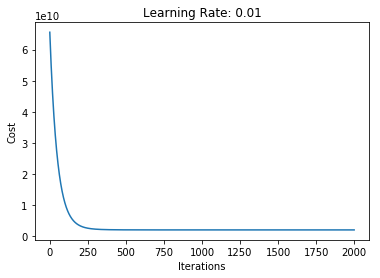

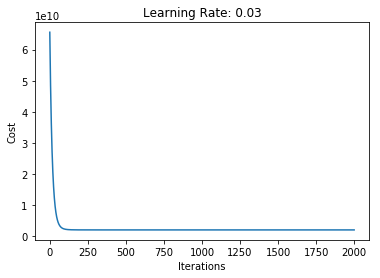

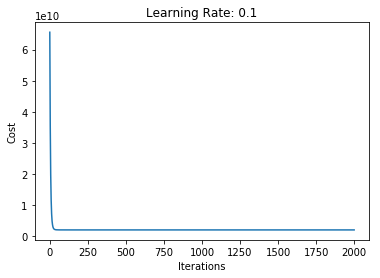

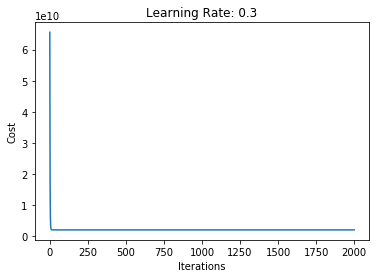

In [20]:
for model in Models:
    plt.figure()
    plt.plot(model['costs'])
    plt.title('Learning Rate: ' + str(model['learning_rate']))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

_Making Prediction for 1650 sq-ft and 3 bedrooms. Gives same answer as by using normal equations (see the normal equations notebook)_

In [23]:
get_prediction(Models[1], np.array([[1650, 3]]))

array([[293081.46433493]])